## Logistic Regression

In [70]:
# g(E(y)) = α + βx1 + γx2
# g() is the link function, E(y) is the expectation of target variable 
# and α + βx1 + γx2 is the linear predictor ( α,β,γ to be predicted)

# g(y) = βo + β(Age) 

# p = exp(βo + β(Age)) = e^(βo + β(Age))

# p  =  exp(βo + β(Age)) / exp(βo + β(Age)) + 1   =   e^(βo + β(Age)) / e^(βo + β(Age)) + 1

# p = e^y/ 1 + e^y

# q = 1 - p = 1 - (e^y/ 1 + e^y)

# p / (1-p) = e^y

# log(p / (1-p)) = y

# log(p / (1-p)) = βo + β(Age) 

In [71]:
from IPython.display import Image

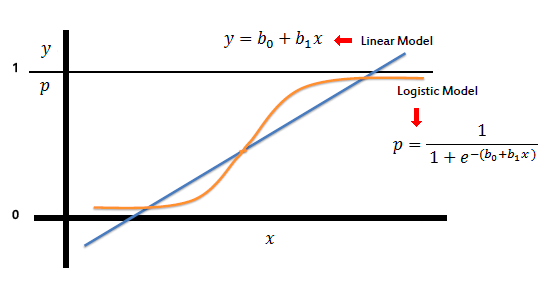

In [72]:
Image("/Users/ramkrishnapotdar/Desktop/logistic_regression.png")

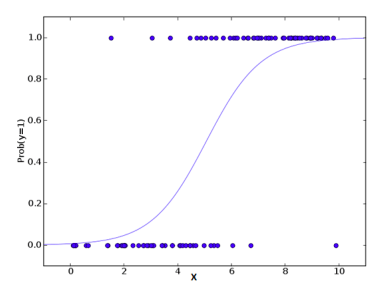

In [73]:
Image("/Users/ramkrishnapotdar/Desktop/logistic_2.png")

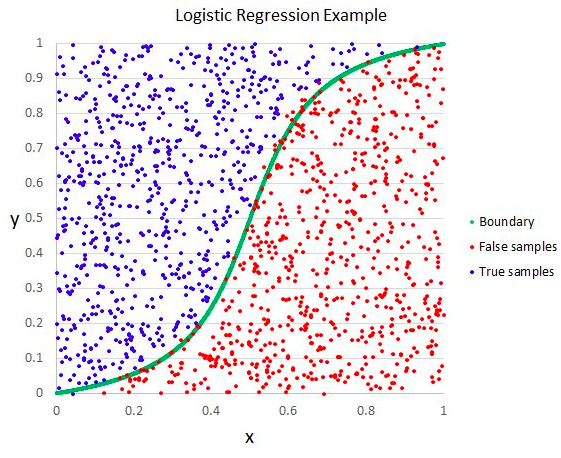

In [74]:
Image("/Users/ramkrishnapotdar/Desktop/logistic_3.png")

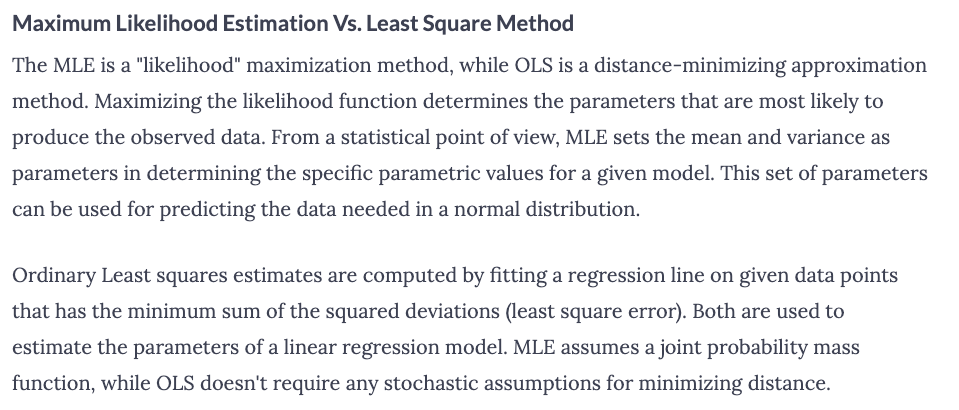

In [75]:
Image("/Users/ramkrishnapotdar/Desktop/logistic_mle.png")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [2]:
diab_data = pd.read_csv("/Users/ramkrishnapotdar/Downloads/diabetes.csv")

In [3]:
diab_data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,Outcome
0,148,72,35,0,33.6,6,50,1
1,85,66,29,0,26.6,1,31,0
2,183,64,0,0,23.3,8,32,1
3,89,66,23,94,28.1,1,21,0
4,137,40,35,168,43.1,0,33,1


In [4]:
diab_data.shape

(768, 8)

In [79]:
diab_data['Glucose'] = diab_data['Glucose'].replace(0, np.nan)
diab_data['BloodPressure'] = diab_data['BloodPressure'].replace(0, np.nan) 
diab_data['SkinThickness'] = diab_data['SkinThickness'].replace(0, np.nan) 
diab_data['Insulin'] = diab_data['Insulin'].replace(0, np.nan)        
diab_data['BMI'] = diab_data['BMI'].replace(0, np.nan) 
diab_data['Age'] = diab_data['Age'].replace(0, np.nan) 

diab_data.head(8)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,Outcome
0,148.0,72.0,35.0,NaN,33.6,6,50,1
1,85.0,66.0,29.0,NaN,26.6,1,31,0
2,183.0,64.0,NaN,NaN,23.3,8,32,1
3,89.0,66.0,23.0,94.0,28.1,1,21,0
4,137.0,40.0,35.0,168.0,43.1,0,33,1
5,116.0,74.0,NaN,NaN,25.6,5,30,0
6,78.0,50.0,32.0,88.0,31.0,3,26,1
7,115.0,NaN,NaN,NaN,35.3,10,29,0


In [80]:
diab_data['BMI'].fillna(diab_data['BMI'].median(), inplace=True)
diab_data['Glucose'].fillna(diab_data['Glucose'].median(), inplace=True)
diab_data['BloodPressure'].fillna(diab_data['BloodPressure'].median(), inplace=True)
diab_data['SkinThickness'].fillna(diab_data['SkinThickness'].median(), inplace=True)
diab_data['Insulin'].fillna(diab_data['Insulin'].median(), inplace=True)

In [81]:
diab_data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208,3.845052,33.240885,0.348958
std,30.438286,12.096642,8.791221,86.383060,6.875177,3.369578,11.760232,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.000000,21.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,1.000000,24.000000,0.000000
50%,117.000000,72.000000,29.000000,125.000000,32.300000,3.000000,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,6.000000,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,17.000000,81.000000,1.000000


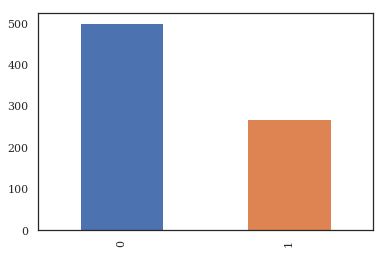

In [82]:
sns.set_context("paper")
sns.set(font='serif')
sns.set_style("white", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"]
})
diab_data['Outcome'].value_counts().plot(kind='bar') 
plt.show()

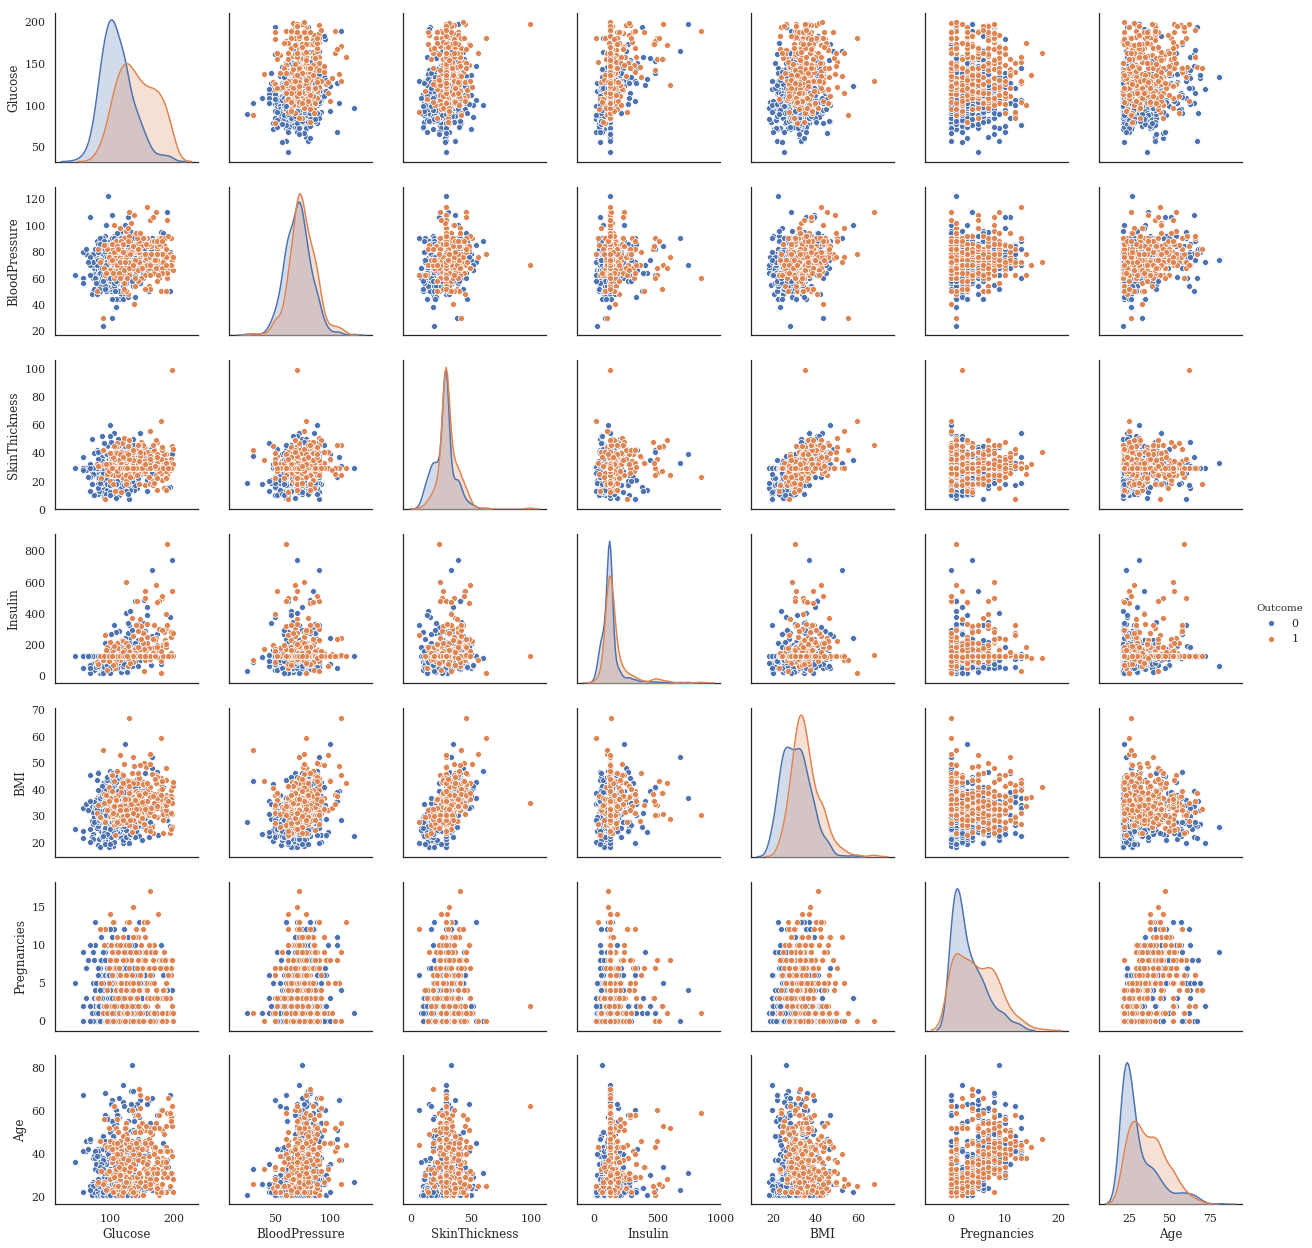

In [83]:
columns = list(diab_data.columns.values)
features = [x for x in columns if x != 'Outcome']
sns.pairplot(diab_data, hue='Outcome', 
             x_vars=features, y_vars=features, height=2.5)
plt.show()

Text(0, 0.5, 'Age')

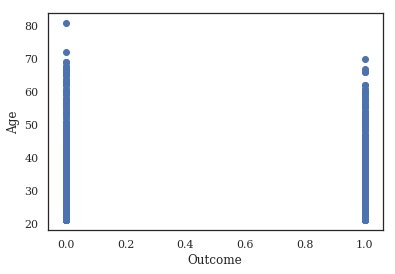

In [84]:
plt.scatter(x='Outcome',y='Age',data=diab_data)
plt.xlabel('Outcome')
plt.ylabel('Age')

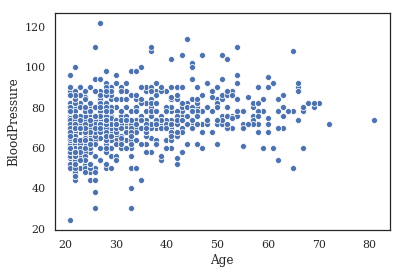

In [85]:
sns.scatterplot(x='Age',y='BloodPressure',data=diab_data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113a9bcf8>,
      dtype=object)

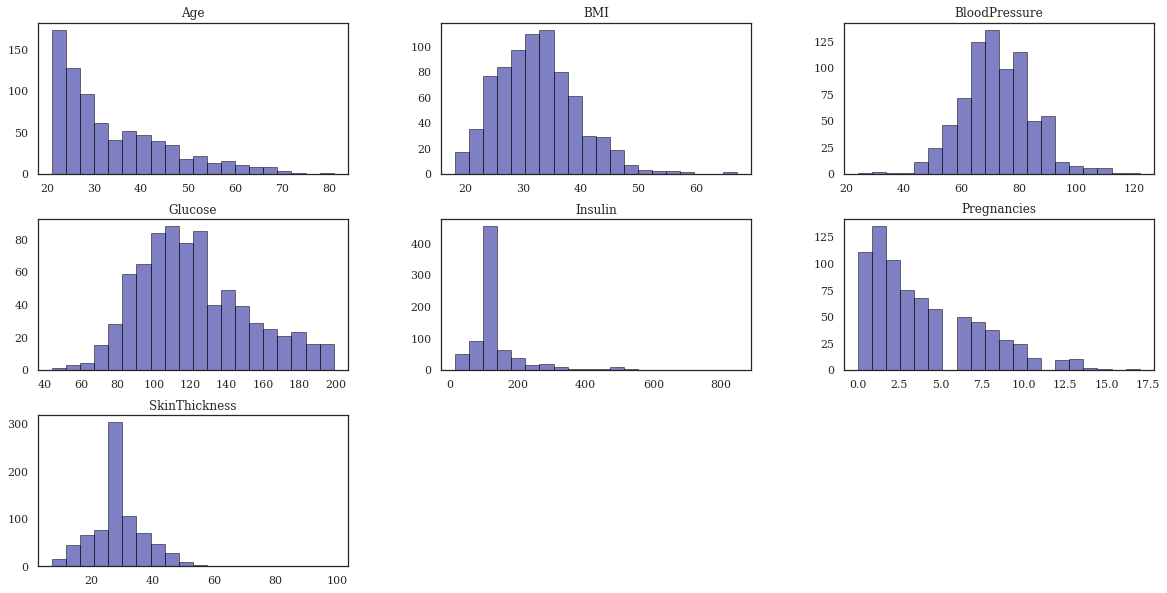

In [86]:
diab_data.iloc[:,:-1].hist(bins=20, figsize=(20,10), grid=False, edgecolor='black', alpha=0.5, color='darkblue')

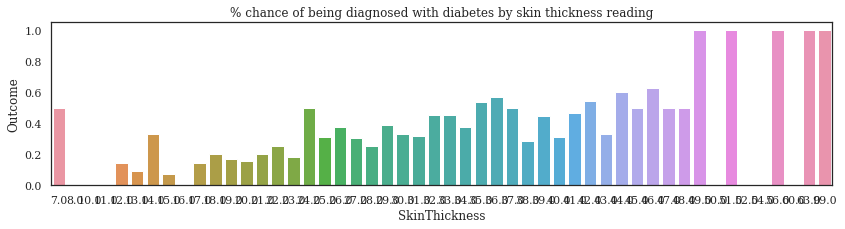

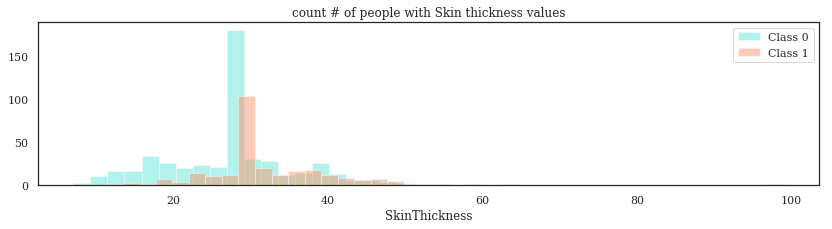

In [87]:
plt.figure(figsize=(14,3))
SkinThickness_pivot = diab_data.groupby('SkinThickness').Outcome.mean().reset_index()
sns.barplot(SkinThickness_pivot.SkinThickness, SkinThickness_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by skin thickness reading')
plt.show()

plt.figure(figsize=(14,3))
SkinThickness_pivot = diab_data.groupby('SkinThickness').Outcome.count().reset_index()
sns.distplot(diab_data[diab_data.Outcome == 0]['SkinThickness'], color='turquoise', kde=False, label='Class 0')
sns.distplot(diab_data[diab_data.Outcome == 1]['SkinThickness'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Skin thickness values')
plt.show()

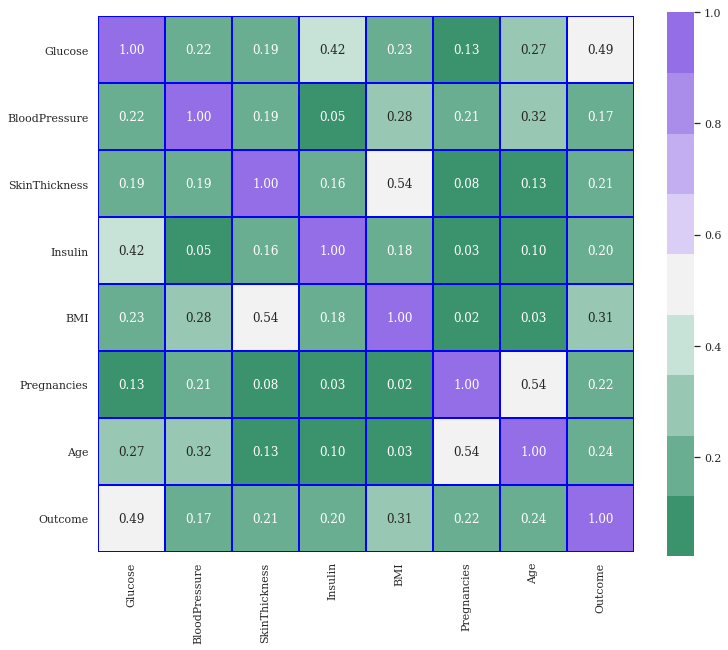

In [88]:
f,ax = plt.subplots(figsize=(12,10))
cmap=sns.diverging_palette(150, 275, s=80, l=55,n=9)
sns.heatmap(
diab_data.corr(), 
annot=True, annot_kws={'size':12},
linewidths=.8,linecolor="blue", fmt= '.2f',ax=ax,square=True,cmap=cmap)

plt.show()

In [89]:
from sklearn.utils import resample
data_majority= diab_data.loc[diab_data['Outcome']==0]
data_minority= diab_data.loc[diab_data['Outcome']==1]

In [90]:
data_minority_resampled= resample(data_minority, replace=True, n_samples=500, random_state=0)

In [91]:
upsample_data = pd.concat([data_majority, data_minority_resampled])

In [92]:
upsample_data['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

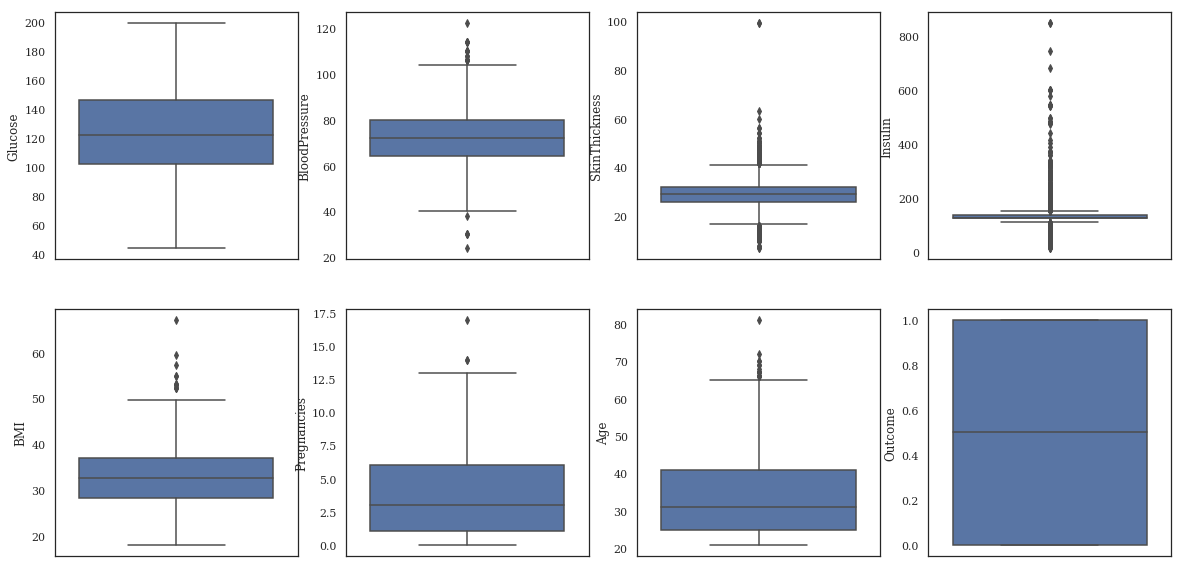

In [93]:
fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
for i in range(0,4):
    sns.boxplot(y=upsample_data.iloc[:,i], ax=ax[0,i])
for j in range(4,8):
    sns.boxplot(y=upsample_data.iloc[:,j], ax=ax[1,j-4])

In [94]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, roc_auc_score

In [95]:
feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Pregnancies', 'Age']
X = diab_data[feature_cols] # Features
y = diab_data.Outcome

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [97]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

/Users/ramkrishnapotdar/Projects/code/Ipython/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[96, 11],
       [23, 24]])

Text(0.5, 257.44, 'Predicted label')

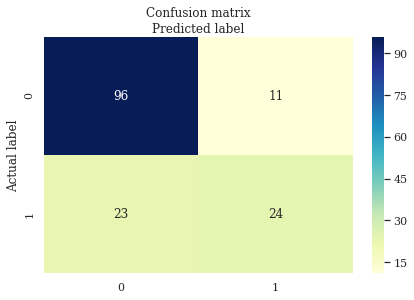

In [99]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7792207792207793
Precision: 0.6857142857142857
Recall: 0.5106382978723404


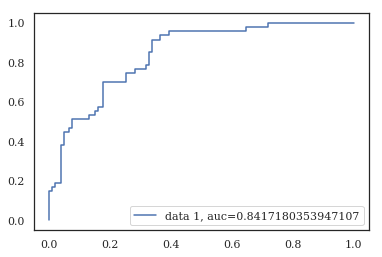

In [101]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## KNN - k nearest neighbours

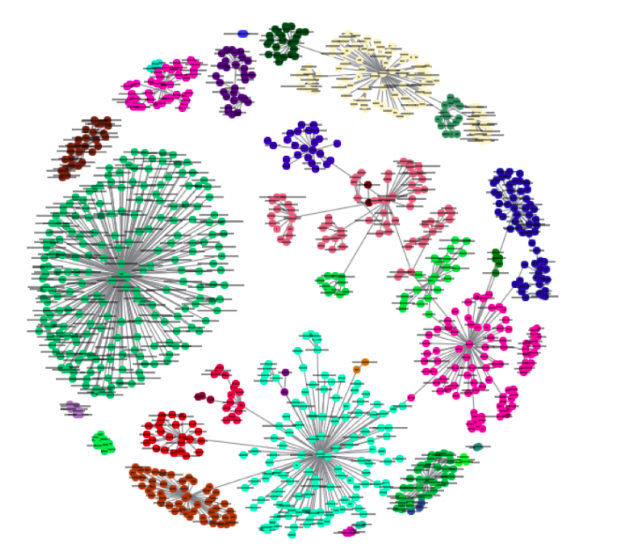

In [105]:
Image("/Users/ramkrishnapotdar/Desktop/knn.png")

In [103]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')
#‘distance’ : weight points, closer neighbors  have  greater influence than neighbors far away.
#‘uniform’ : uniform weights, all points are weighted equally
#algorithm :‘auto’  to decide the most appropriate algorithm 
# n_neighbors = k
knn.fit(X_train,y_train)
y_pre_knn = knn.predict(X_test)
print(" With KNN (K= {}) accuracy is: {} ".format(16,knn.score(X_test,y_test)))
knn_acc=knn.score(X_test,y_test)

 With KNN (K= 16) accuracy is: 0.7987012987012987 


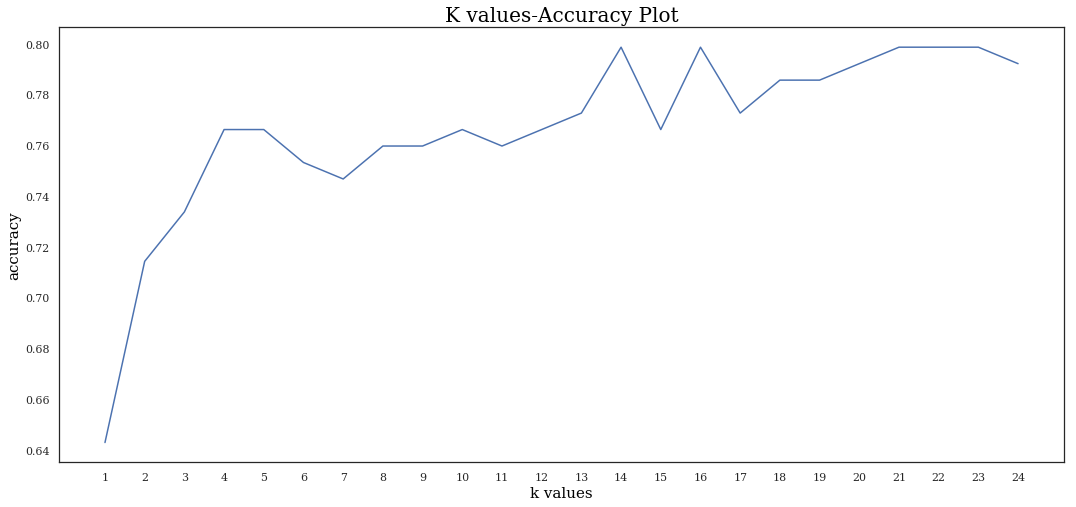

Best accuracy is 0.7987012987012987 with K = 14


In [104]:
k_list = []
for each in range(1,25):
    knn_2 = KNeighborsClassifier(n_neighbors = each)
    knn_2.fit(X_train,y_train)
    k_list.append(knn_2.score(X_test,y_test))
    

f = plt.subplots(figsize=(18,8))
plt.plot(range(1,25),k_list)
   
plt.xlabel('k values',fontsize = 15,color='black')             
plt.ylabel('accuracy',fontsize = 15,color='black')
plt.title('K values-Accuracy Plot',fontsize = 20,color='black')
plt.xticks(range(1,25))
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(k_list),1+k_list.index(np.max(k_list))))

In [5]:
# tuples

In [6]:
t1 = (10,20,30,'hello', [1,2,3,4])

In [7]:
type(t1)

tuple

In [9]:
t1[0] = 100

TypeError: 'tuple' object does not support item assignment

In [10]:
t1[-1]

[1, 2, 3, 4]

In [11]:
t1[-1]= 200

TypeError: 'tuple' object does not support item assignment

In [12]:
t1

(10, 20, 30, 'hello', [1, 2, 3, 4])

In [13]:
t1[-1][0] = 10

In [14]:
t1

(10, 20, 30, 'hello', [10, 2, 3, 4])

In [15]:
t1[-1].pop()

4

In [16]:
t1[-1].pop()

3

In [17]:
t1[-1].pop()

2

In [18]:
t1[-1].pop()

10

In [19]:
 t1

(10, 20, 30, 'hello', [])

In [20]:
l1 = [10,20,30,(1,2,3)]

In [21]:
l1[0] = 100

In [22]:
l1

[100, 20, 30, (1, 2, 3)]

In [23]:
l1[-1][0] = 10

TypeError: 'tuple' object does not support item assignment

In [25]:
d1 = {(1,2,3):100}

In [26]:
d1

{(1, 2, 3): 100}

In [27]:
d1[(1,2,3, [10,20,30])] = 200

TypeError: unhashable type: 'list'